In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("datasets/AdTracking.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ip             1080 non-null   int64
 1   app            1080 non-null   int64
 2   device         1080 non-null   int64
 3   os             1080 non-null   int64
 4   channel        1080 non-null   int64
 5   is_attributed  1080 non-null   int64
dtypes: int64(6)
memory usage: 50.8 KB


In [3]:
dataset.head()

,ip,app,device,os,channel,is_attributed
0,204158,35,1,13,21,1
1,29692,9,1,22,215,1
2,64516,35,1,13,21,1
3,172429,35,1,46,274,1
4,199085,35,1,13,274,1


<AxesSubplot:title={'center':'Freq of app downloaded'}>

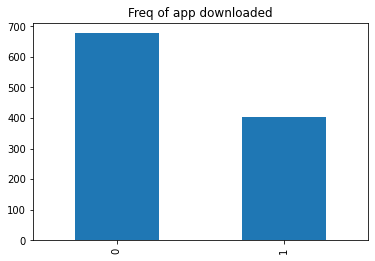

In [4]:
dataset["is_attributed"].value_counts().plot(kind="bar", title="Freq of app downloaded")

In [5]:
# return all rows that contain 1 or more NaN values
dataset[dataset.isna().any(axis=1)]

,ip,app,device,os,channel,is_attributed


In [6]:
# predictor attributes
X = dataset.iloc[:, :-1].values 
# target attribute
y = dataset.iloc[:, -1].values  

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
from sklearn.svm import SVC
SVM = SVC(kernel="linear")
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = SVM.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac * 100)